# **LPA PIC/Laser Plasma Notes and Code**

In [1]:
# Import default stuff
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import Video
from IPython.display import Image
import matplotlib as mpl
from IPython.display import HTML
%matplotlib inline

# **Ruhl 08**

## Characteristics that specify laser-plasma properties

* **Property 1:** Ratio of plasma density $n$ to laser critical density $n_c$.

    * If $n=n_c$ then the laser frequency is the electron plasma frequency $\omega_p= (e^2n/\epsilon_0 m_e)^{1/2}$
    
        * In this case, $\frac{\omega_p}{\omega}=\left( \frac{n}{n_c} \right)^{1/2}$

    * A plasma that has $\frac{\omega_p}{\omega} < 1$ is called **under-critical** or **under-dense** while $\frac{\omega_p}{\omega} > 1$ is called **over-critical** or **over-dense**.

    * **Group velocity:** $v_g = \frac{\partial \omega}{\partial k}$ of the laser radiation can approach $c$ and depends on plasma density. 

    * **Penetration depth:**  $l_s = c/\omega_p$.

* **Property 2:** Amplitude $a$ of laser field.

    * Dimensionless and defined by $a = v_{os}/c$. Accounts for relativistic plasma effects.

        * **Electron oscillation velocity:** $v_{os} = \frac{e \ E_0}{m_e \omega}$
        
        * **Vacuum field strength of laser radiation:** $E_0$

* **Property 3:** Initial plasma temperature.

    * Characterized by $v_{th}/c$c

        * **Thermal velocity:** $v_{th} = (k_B \ T_e / m_e)^{1/2}$

        * **Plasma Temperature:** T_e

With the above three parameters, we can describe the response of a plasma to any applied electric and magnetic fields. In cases where plasma can not be approximated as collisionless, other parameters become important. 


### Electron interacting witih linearly polarized plane EM wave

Equations of motion:

$$\epsilon = \frac{1}{2} m_e c^2a^2, \quad \mathbf{p_{\perp}} = m_e c \mathbf{a_\perp} \quad p_{\parallel} = \frac{1}{2}m_e c a^2$$

Where:

* $\epsilon$ is electron energy.

* $\mathbf{p_\perp}$ is the momentum perpendicular to wave propagation direction.

* $\mathbf{p_\parallel}$ is the momentum parallel to wave propagation direction.
    
* $\mathbf{a_\perp} = \frac{e \mathbf{A_\perp}}{m_e \ c}$.

    * $\mathbf{A_\perp} = \frac{\mathbf{E_\perp}}{\omega}$.


When $a > 2$, the electron motion in the wave is relativistic. Laser intensities are called relativistic if $a > 1$. 

### Self focusing

Relativistic self-focusing is caused by a nonlinear change in the refractive index $\eta$ of the plasma caused bu relativstic mass gain of the oscillating electrons in the laser's field as well as ponderomotive force of the laser radiation. It can cause 10X intensity enhancements.

Power threshold for self focusing phenomena (only for beams, not pulses):

$$P_c = \frac{2m_e^2 c^5 \omega ^2}{e^2 \omega_p^2}$$

The self-focused beam also is usually at a non $90^\circ$ angle to the plane normal to propagation.

### Self guiding

Electrons that are accelerated within the laser beam are part of a current that generates a strong magnetic field found with:

$$\nabla \times \mathbf{B} = -\frac{en}{\epsilon_0 c^2}\mathbf{v}$$

# Particle In Cell SMILIEI

PIC is important for fluid dynamics simulations. 

### Vlasov-Maxwell Model

For a collisionless plasma, Vlasov's equation is satisfied:

$$\left( \partial_t + \frac{\mathbf{p}}{m_s \ \gamma}\cdot \nabla + \mathbf{F_L} \cdot \nabla_p\right)f_s = 0$$

Where:

* Different particle species in the plasma have distribution function $f_s(t, \mathbf{x}, \mathbf{p})$.
    * $s$ is a particle species that has charge $q_s$ and mass $m_s$.
    * $\mathbf{x, p}$ are position and momentum of an element in phase-space.
    * The relativistic Lorentz factor: $\gamma = \sqrt{1 + \mathbf{p}^2/(m_sc)^2}$.
    * Lorentz force on a particle of velocity $\mathbf{v} = \mathbf{p}/(m_s \gamma)$ is given by $\mathbf{F_L} = q_s (\mathbf{E}+\mathbf{v} \times \mathbf{B})$.

The Lorentz force allows for electric and magnetic fields that satisfy Maxwell's equations, which are:

$$\nabla \cdot \mathbf{B} = 0, \quad \nabla \cdot \mathbf{E} = \rho/\epsilon_0$$
$$\nabla \times \mathbf{B} = \mu_0 \mathbf{J} + \mu_0 \epsilon_0 \partial_t \mathbf{E}, \quad \nabla \times \mathbf{E} = \partial_t \mathbf{B}$$

This set of equations/constraints are known as the Vlasov-Maxwell model.

The electric field $\mathbf{E}(t, \mathbf{x})$ and magnetic field $\mathbf{B}(t, \mathbf{x})$ created are modified by the charge and current densities which are:

$$\rho(t, \mathbf{x}) = \sum_s q_s \int d^3 p \ f_s(t, \mathbf{x}, \mathbf{p})$$
$$\mathbf{J}(t, \mathbf{x}) = \sum_s q_s \int d^3p \ \mathbf{v} \ f_s(t, \mathbf{x}, \mathbf{p})$$

SMILEI's approach uses natural units where $c=1$, and charges/masses are given in term of elementary charge/electron mass. Time and space normalization can be tweaked and scaled.

### PIC Method

In PIC, the particle distribution function is quantized and is a sum of "quasi-particles":

$$f_s(t, \mathbf{x}, \mathbf{p}) = \sum^{N_s}_{p=1}w_p \ S(\mathbf{x} - \mathbf{x}_p(t))\delta (\mathbf{p} - \mathbf{p}_p(t)).$$

Where:
* $w_p$ is the "weight" of a quasi-particle
* $\mathbf{x_p}$ is quasi-particle position
* $\mathbf{p_p}$ is quasi-particle momentum
* $S(\mathbf{x})$ is the shape function of the quasi particles.
    * It's pretty complicated *COME BACK TO THIS

In PIC code, we have to integrate Vlasov's equation along the trajectories of quaso-particles and solve Maxwell's equations on a discrete spatial grid. Spaces between grid nodes are "cells." Using the discretization approach, we can get the relativistic equations of motion for all quasi-particles:

$$\frac{d\mathbf{x}_p}{dt} = \frac{\mathbf{u}_p}{\gamma_p}, \quad \frac{d\mathbf{u}_p}{dt} = r_s \left(\mathbf{E}_p + \frac{\mathbf{u_p}}{\gamma_p} \times \mathbf{B}_p \right).$$

Where:

* **Charge-over-mass ratio**: $r_s = q_s/m_s$ for species $s$
* **Quasi-particle reduced momentum**: $\mathbf{u}_p = \mathbf{p}_p/m_s$

The electric and magnetic fields also have to be interpolated at the positions of every particle, and Maxwell's equations must be solved as well.


In [20]:
# PIC Practice in a uniform E and B field (Ignoring Maxwell)

 # I: Load in particles

from scipy.integrate import solve_ivp

class PIC_uniform:
    """
    An implementation of PIC in a cubic grid without worrying about Maxwell's equations

    Parameters:
        n (int): number of species
        p (int): number of quasi-particles per species
        E (float): Electric field strength (global)
        B (float): Magnetic field strength (global)
        size (int): Grid length 
    """

    def __init__(self, N=2, p=3, E=[5,5,5], B=[5,5,5], momentum_mean=10, momentum_sigma=1.5, size=20, charge_scale = 3, mass_scale = 3):
        #np.random.seed(random_state)
        # Make interaction matrix 
        self.N = N
        self.p = p
        self.E = E
        self.B = B
        self.size = size
        self.charge_scale = 3

        # Initial positions, momenta
        positions = np.zeros([N, p, 3])
        momenta = np.zeros([N, p, 3])
        charges = np.zeros([N])
        masses = np.zeros([N])
        
        for i in range(N):
            charges[i] = np.random.uniform() * charge_scale
            masses[i] = np.random.uniform() * mass_scale

            for j in range(p):
                x_p = np.random.uniform(size=(3)) * size
                m_p = np.random.normal(momentum_mean, momentum_sigma, size=(3))

                for k in range(3):
                    positions[i][j][k] = x_p[k]
                    momenta[i][j][k] = m_p[k]

        self.positions = positions
        self.momenta = momenta
        self.charges = charges
        self.masses = masses

    # Assemble momentum differential equation
    def rhs_momentum(self, t, n):
        """
        Given a time and a momentum vector, return the right-hand side for the quasi-particle momentum
        """
        rhs = np.zeros([self.N, self.p])

        for i in range(self.N):
            r_s = self.charges[i]/self.masses[i]
            p_i = [0,0,0]

            for j in range(self.p):

                for k in range(3):
                    p_i[k] = self.momenta[i][j][k]
                    gamma = np.sqrt(1+np.dot(p_i, p_i)/(self.masses**2))
                    #CONT




    def plot_position(self):
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        ax.set_title('Particle positions 3D')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_xlim(self.size)
        ax.set_ylim(self.size)
        ax.set_zlim(self.size)

        for i in range(self.N):
            for j in range(self.p):
                ax.scatter(self.positions[i][j][0], self.positions[i][j][1], self.positions[i][j][2], cmap='plasma')

    def plot_momentum(self):
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        ax.set_title('Particle Momenta 3D')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_xlim(self.size)
        ax.set_ylim(self.size)
        ax.set_zlim(self.size)

        for i in range(self.N):
            for j in range(self.p):
                ax.scatter(self.momenta[i][j][0], self.momenta[i][j][1], self.momenta[i][j][2])


        plt.show()



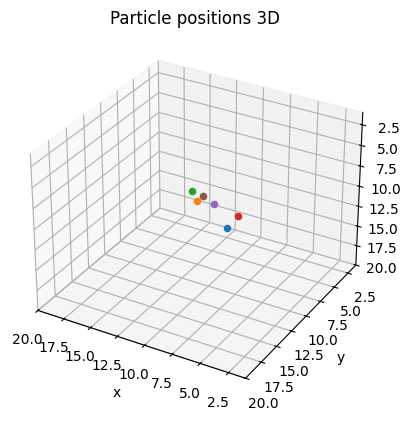

In [21]:
# Tests:
pic_test = PIC_uniform()
pic_test.plot_momentum()

array([0, 0, 1])